In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

,Unnamed: 0,building id,Peak Load
0,0,1,27.724174
1,0,2,20.164945
2,0,3,18.771555
3,0,4,16.617412
4,0,5,27.902137
...,...,...,...
395,0,396,12.189566
396,0,397,12.662940
397,0,398,4.833286
398,0,399,14.577960


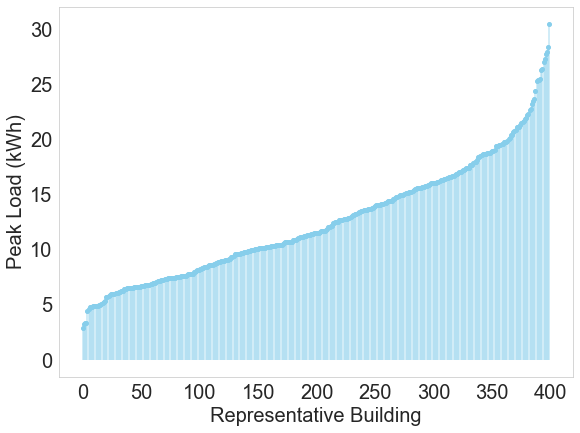

In [8]:
# Read building peak load:
load_folder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\Peakload.xlsx"
peakLoad = pd.read_excel(load_folder)

# Graph peak load:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_peakLoad = peakLoad.sort_values(by='Peak Load')
ordered_peakLoad = ordered_peakLoad.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Peak Load (kWh)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
peakLoad

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgSO4 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.421934,10.421934,25
1,210,0,211,3.267824,4.357098,11.618214,11.618214,25
2,233,0,234,3.335892,4.447856,11.860219,11.860219,25
3,338,0,339,3.346160,4.461547,11.896726,11.896726,25
4,99,0,100,4.456120,5.941494,15.843009,15.843009,25
...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.206532,97.206532,100
396,0,0,1,27.724174,36.965566,98.568777,98.568777,100
397,4,0,5,27.902137,37.202850,99.201496,99.201496,100
398,399,0,400,28.411462,37.881950,101.012317,101.012317,125


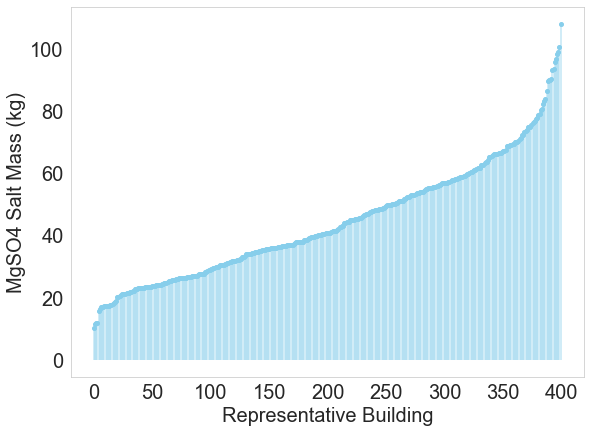

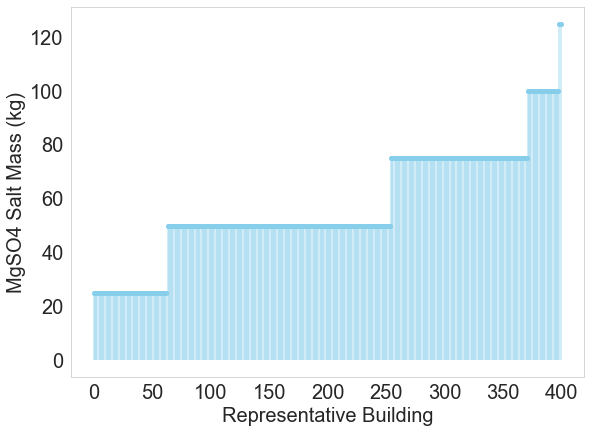

In [9]:
# Calculate salt masses required for MgSO4:
ordered_peakLoad['MgSO4 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.75
ordered_peakLoad['MgSO4 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.281267306
ordered_peakLoad['MgSO4 Salt Mass'] = ordered_peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)

ordered_peakLoad['MgSO4 Salt Mass sized'] = ordered_peakLoad['MgSO4 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)
#ordered_peakLoad['MgSO4 Salt Mass sized'] = ordered_peakLoad['MgSO4 Salt Mass']
ordered_peakLoad

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgSO4 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgSO4 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgSO4 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgSO4 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_peakLoad

In [6]:
ordered_peakLoad['MgSO4 Salt Mass sized'].mean()

100.5

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgSO4 Salt Mass sized,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.421934,10.421934,25,15.183932,34.580891,34.580891,50
1,210,0,211,3.267824,4.357098,11.618214,11.618214,25,16.926818,38.550254,38.550254,50
2,233,0,234,3.335892,4.447856,11.860219,11.860219,25,17.279401,39.353249,39.353249,50
3,338,0,339,3.346160,4.461547,11.896726,11.896726,25,17.332587,39.474380,39.474380,50
4,99,0,100,4.456120,5.941494,15.843009,15.843009,25,23.082009,52.568494,52.568494,75
...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.206532,97.206532,100,141.622220,322.539805,322.539805,325
396,0,0,1,27.724174,36.965566,98.568777,98.568777,100,143.606904,327.059854,327.059854,350
397,4,0,5,27.902137,37.202850,99.201496,99.201496,100,144.528724,329.159269,329.159269,350
398,399,0,400,28.411462,37.881950,101.012317,101.012317,125,147.166948,335.167735,335.167735,350


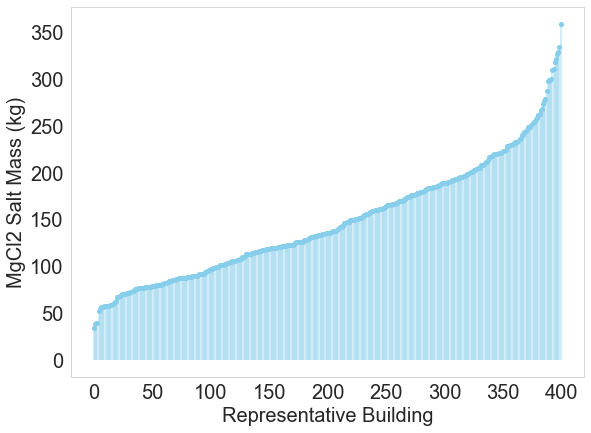

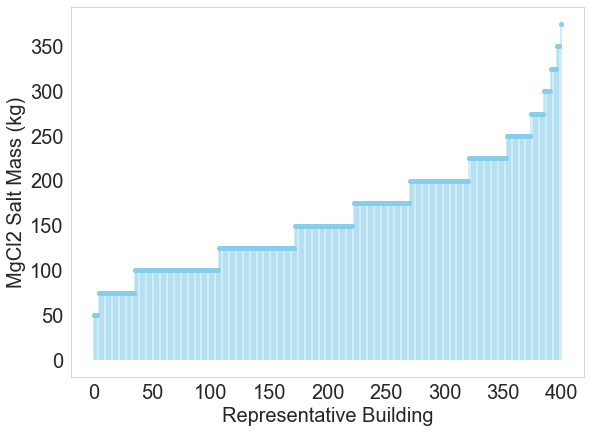

In [10]:
# Calculate salt masses required for MgCl2:
ordered_peakLoad['MgCl2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.193056
ordered_peakLoad['MgCl2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.084767892
ordered_peakLoad['MgCl2 Salt Mass'] = ordered_peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
ordered_peakLoad['MgCl2 Salt Mass sized'] = ordered_peakLoad['MgCl2 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgCl2 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgCl2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['MgCl2 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("MgCl2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_peakLoad

In [8]:
ordered_peakLoad['MgCl2 Salt Mass sized'].mean()

195.25

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgSO4 Salt Mass sized,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,K2CO3 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.421934,10.421934,25,15.183932,34.580891,34.580891,50,15.750543,1.780094,15.750543,25
1,210,0,211,3.267824,4.357098,11.618214,11.618214,25,16.926818,38.550254,38.550254,50,17.558467,1.984422,17.558467,25
2,233,0,234,3.335892,4.447856,11.860219,11.860219,25,17.279401,39.353249,39.353249,50,17.924206,2.025757,17.924206,25
3,338,0,339,3.346160,4.461547,11.896726,11.896726,25,17.332587,39.474380,39.474380,50,17.979378,2.031993,17.979378,25
4,99,0,100,4.456120,5.941494,15.843009,15.843009,25,23.082009,52.568494,52.568494,75,23.943348,2.706028,23.943348,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.206532,97.206532,100,141.622220,322.539805,322.539805,325,146.907057,16.603136,146.907057,150
396,0,0,1,27.724174,36.965566,98.568777,98.568777,100,143.606904,327.059854,327.059854,350,148.965802,16.835811,148.965802,150
397,4,0,5,27.902137,37.202850,99.201496,99.201496,100,144.528724,329.159269,329.159269,350,149.922022,16.943881,149.922022,150
398,399,0,400,28.411462,37.881950,101.012317,101.012317,125,147.166948,335.167735,335.167735,350,152.658695,17.253174,152.658695,175


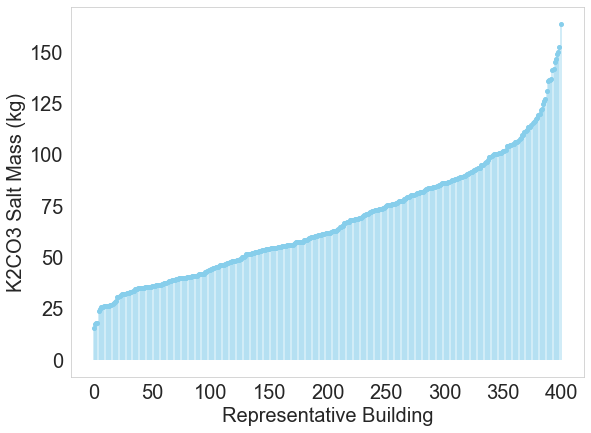

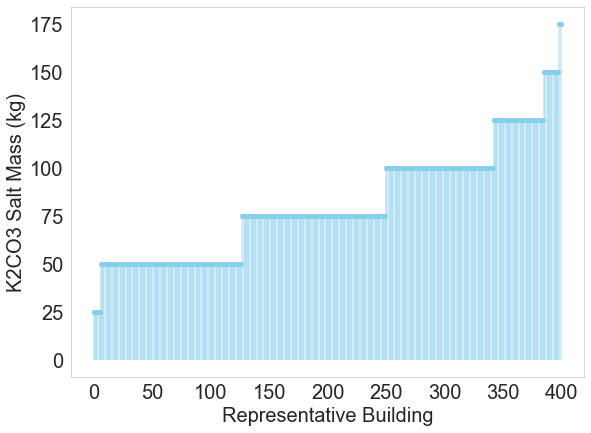

In [11]:
# Calculate salt masses required for K2CO3:
ordered_peakLoad['K2CO3 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.186111
ordered_peakLoad['K2CO3 Salt Mass P'] = ordered_peakLoad['Peak Load']/1.646738256
ordered_peakLoad['K2CO3 Salt Mass'] = ordered_peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
ordered_peakLoad['K2CO3 Salt Mass sized'] = ordered_peakLoad['K2CO3 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)

ordered_peakLoad

fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['K2CO3 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("K2CO3 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['K2CO3 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("K2CO3 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

In [10]:
ordered_peakLoad['K2CO3 Salt Mass sized'].mean()

114.5

,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgSO4 Salt Mass sized,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,MgCl2 Salt Mass sized,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,K2CO3 Salt Mass sized,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass,SrBr2 Salt Mass sized
0,304,0,305,2.931349,3.908466,10.421934,10.421934,25,15.183932,34.580891,34.580891,50,15.750543,1.780094,15.750543,25,8.243389,3.613358,8.243389,25
1,210,0,211,3.267824,4.357098,11.618214,11.618214,25,16.926818,38.550254,38.550254,50,17.558467,1.984422,17.558467,25,9.189606,4.028116,9.189606,25
2,233,0,234,3.335892,4.447856,11.860219,11.860219,25,17.279401,39.353249,39.353249,50,17.924206,2.025757,17.924206,25,9.381024,4.112021,9.381024,25
3,338,0,339,3.346160,4.461547,11.896726,11.896726,25,17.332587,39.474380,39.474380,50,17.979378,2.031993,17.979378,25,9.409899,4.124678,9.409899,25
4,99,0,100,4.456120,5.941494,15.843009,15.843009,25,23.082009,52.568494,52.568494,75,23.943348,2.706028,23.943348,25,12.531272,5.492882,12.531272,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,36.454692,97.206532,97.206532,100,141.622220,322.539805,322.539805,325,146.907057,16.603136,146.907057,150,76.887006,33.702186,76.887006,100
396,0,0,1,27.724174,36.965566,98.568777,98.568777,100,143.606904,327.059854,327.059854,350,148.965802,16.835811,148.965802,150,77.964495,34.174486,77.964495,100
397,4,0,5,27.902137,37.202850,99.201496,99.201496,100,144.528724,329.159269,329.159269,350,149.922022,16.943881,149.922022,150,78.464953,34.393854,78.464953,100
398,399,0,400,28.411462,37.881950,101.012317,101.012317,125,147.166948,335.167735,335.167735,350,152.658695,17.253174,152.658695,175,79.897251,35.021679,79.897251,100


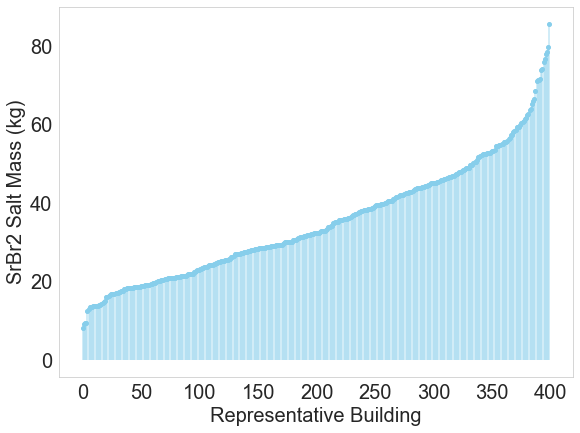

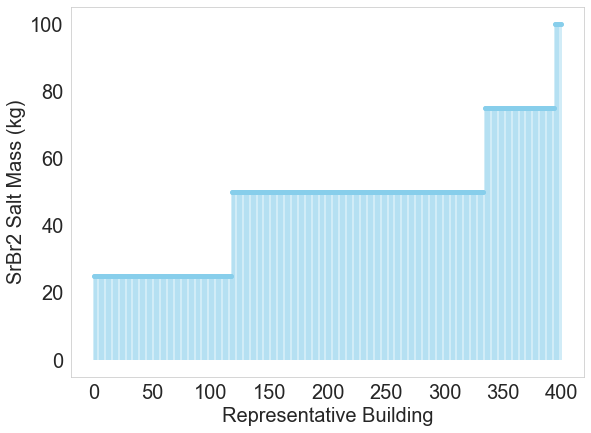

In [12]:
# Calculate salt masses required for SrBr2:
ordered_peakLoad['SrBr2 Salt Mass E'] = ordered_peakLoad['Peak Load']/0.3556
ordered_peakLoad['SrBr2 Salt Mass P'] = ordered_peakLoad['Peak Load']/0.811253581
ordered_peakLoad['SrBr2 Salt Mass'] = ordered_peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
ordered_peakLoad['SrBr2 Salt Mass sized'] = ordered_peakLoad['SrBr2 Salt Mass'].apply(lambda x: int(math.ceil(x/25.0))*25)
ordered_peakLoad

fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['SrBr2 Salt Mass'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("SrBr2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Graph MgSO4 mass:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_peakLoad.index, ordered_peakLoad['SrBr2 Salt Mass sized'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("SrBr2 Salt Mass (kg)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ordered_peakLoad

In [12]:
ordered_peakLoad['SrBr2 Salt Mass sized'].mean()

100.0